In [1]:
%matplotlib inline

import numpy as np
import os 
import gc
import cv2
from PIL import Image
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from time import time
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

from clusters import Cluster
from back import Back
from selector import Selector
from color_detect import ColorDetector

In [2]:
path = "../datasets/color_dataset/"

In [3]:
def centroid_histogram(classifications):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(classifications)) + 1)
	(hist, _) = np.histogram(classifications, bins = numLabels)
 
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist

In [4]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0

	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.082s.
Predicting color indices on the full image (k-means)
done in 0.049s.


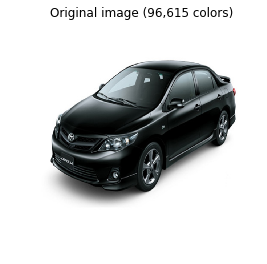

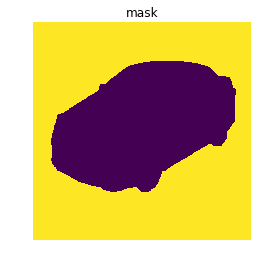

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.088s.
Predicting color indices on the full image (k-means)
done in 0.062s.


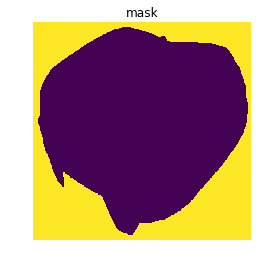

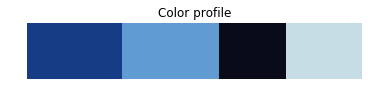

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.099s.
Predicting color indices on the full image (k-means)
done in 0.071s.


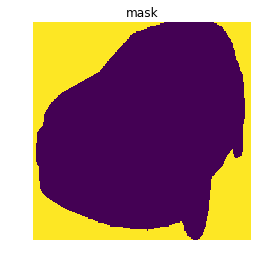

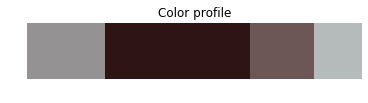

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.085s.
Predicting color indices on the full image (k-means)
done in 0.061s.


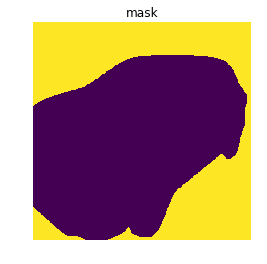

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.079s.
Predicting color indices on the full image (k-means)
done in 0.070s.


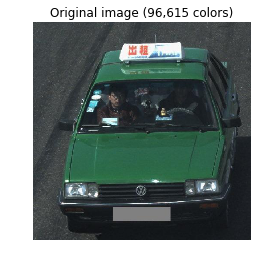

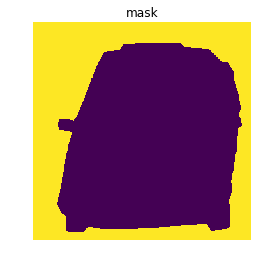

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.105s.
Predicting color indices on the full image (k-means)
done in 0.075s.


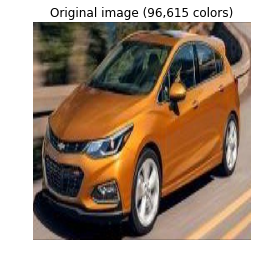

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.161s.
Predicting color indices on the full image (k-means)
done in 0.089s.


C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.123s.
Predicting color indices on the full image (k-means)
done in 0.080s.


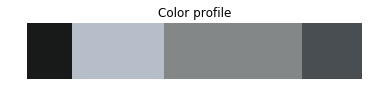

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.129s.
Predicting color indices on the full image (k-means)
done in 0.078s.


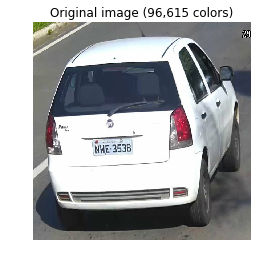

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Fitting model on a small sub-sample of the data
done in 0.160s.
Predicting color indices on the full image (k-means)
done in 0.081s.


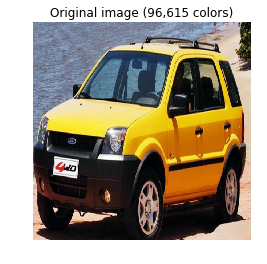

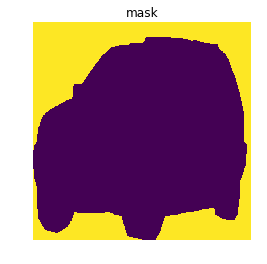

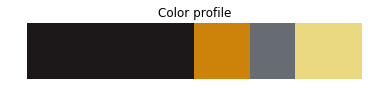

In [5]:
folder_list = ['color_examples']
for folder in folder_list:
    for item in os.listdir(folder):
        n_colors = 4

        # Load the Summer Palace photo
        china = resize(plt.imread(folder + '/' + item), (600,600))

        # Convert to floats instead of the default 8 bits integer coding. Dividing by
        # 255 is important so that plt.imshow behaves works well on float data (need to
        # be in the range [0-1])
        #china = np.array(china, dtype=np.float64) / 255
        
#         remover = Back(15)
        imb = resize(plt.imread('masks/' + item[:-4] + '_mask.png'), (600,600)) == 0
        im = china[~imb[:,:,0]]

        # Load Image and transform to a 2D numpy array.
        w, h, d = original_shape = tuple(china.shape)
        assert d == 3
        image_array = np.reshape(china, (w * h, d))

        print("Fitting model on a small sub-sample of the data")
        t0 = time()
        image_array_sample = shuffle(im, random_state=0)[:1000]
        kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
        print("done in %0.3fs." % (time() - t0))

        # Get labels for all points
        print("Predicting color indices on the full image (k-means)")
        t0 = time()
        labels = kmeans.predict(im)
        print("done in %0.3fs." % (time() - t0))


#         codebook_random = shuffle(image_array, random_state=0)[:n_colors]
#         print("Predicting color indices on the full image (random)")
#         t0 = time()
#         labels_random = pairwise_distances_argmin(codebook_random,
#                                                   image_array,
#                                                   axis=0)
#         print("done in %0.3fs." % (time() - t0))


#         def recreate_image(codebook, labels, w, h):
#             """Recreate the (compressed) image from the code book & labels"""
#             d = codebook.shape[1]
#             image = np.zeros((w, h, d))
#             label_idx = 0
#             for i in range(w):
#                 for j in range(h):
#                     image[i][j] = codebook[labels[label_idx]]
#                     label_idx += 1
#             return image
        
#         img = recreate_image(kmeans.cluster_centers_, labels, w, h)
        
        # Display all results, alongside original image
        plt.figure(1)
        plt.clf()
        plt.axis('off')
        plt.title('Original image (96,615 colors)')
        plt.imshow(china)

        plt.figure(2)
        plt.clf()
        plt.axis('off')
        plt.title('mask')
        plt.imshow(imb[:,:,0])

#         plt.figure(3)
#         plt.clf()
#         plt.axis('off')
#         plt.title('Quantized image ({} colors, Random)'.format(n_colors))
#         plt.imshow(recreate_image(codebook_random, labels_random, w, h))
#         plt.show()

#         im = plt.imread('./imgs/carvana_example.jpg')



        hist = centroid_histogram(kmeans.labels_)
        bar = plot_colors(hist, kmeans.cluster_centers_*255)

        plt.figure(3)
        plt.axis("off")
        plt.title('Color profile')
        plt.imshow(bar)
        plt.show()

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


Fitting model on a small sub-sample of the data
done in 0.114s.
Predicting color indices on the full image (k-means)
done in 0.113s.


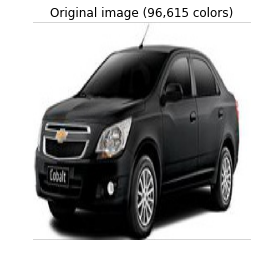

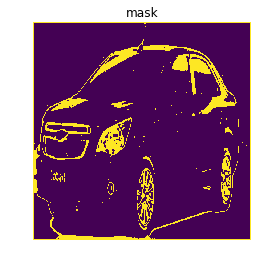

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


Fitting model on a small sub-sample of the data
done in 0.195s.
Predicting color indices on the full image (k-means)
done in 0.136s.


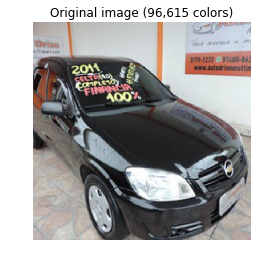

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


Fitting model on a small sub-sample of the data
done in 0.169s.
Predicting color indices on the full image (k-means)
done in 0.089s.


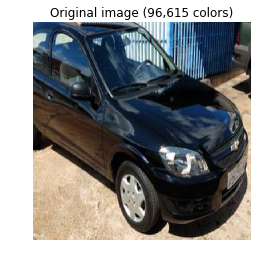

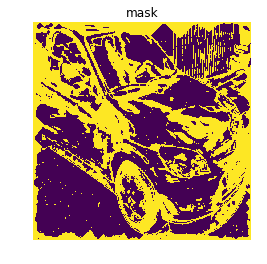

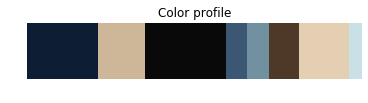

C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Saulo\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


KeyboardInterrupt: 

In [6]:
for folder in os.listdir(path):
    for item in os.listdir(path + '/' + folder):
        n_colors = 8

        # Load the Summer Palace photo
        china = resize(plt.imread(path + '/' + folder + '/' + item), (600,600))

        # Convert to floats instead of the default 8 bits integer coding. Dividing by
        # 255 is important so that plt.imshow behaves works well on float data (need to
        # be in the range [0-1])
        #china = np.array(china, dtype=np.float64) / 255
        
        remover = Back(15)
        imb = remover.remove_bg(china)
        im = china[~imb]

        # Load Image and transform to a 2D numpy array.
        w, h, d = original_shape = tuple(china.shape)
        assert d == 3
        image_array = np.reshape(china, (w * h, d))

        print("Fitting model on a small sub-sample of the data")
        t0 = time()
        image_array_sample = shuffle(im, random_state=0)[:1000]
        kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
        print("done in %0.3fs." % (time() - t0))

        # Get labels for all points
        print("Predicting color indices on the full image (k-means)")
        t0 = time()
        labels = kmeans.predict(im)
        print("done in %0.3fs." % (time() - t0))


#         codebook_random = shuffle(image_array, random_state=0)[:n_colors]
#         print("Predicting color indices on the full image (random)")
#         t0 = time()
#         labels_random = pairwise_distances_argmin(codebook_random,
#                                                   image_array,
#                                                   axis=0)
#         print("done in %0.3fs." % (time() - t0))


#         def recreate_image(codebook, labels, w, h):
#             """Recreate the (compressed) image from the code book & labels"""
#             d = codebook.shape[1]
#             image = np.zeros((w, h, d))
#             label_idx = 0
#             for i in range(w):
#                 for j in range(h):
#                     image[i][j] = codebook[labels[label_idx]]
#                     label_idx += 1
#             return image
        
#         img = recreate_image(kmeans.cluster_centers_, labels, w, h)
        
        # Display all results, alongside original image
        plt.figure(1)
        plt.clf()
        plt.axis('off')
        plt.title('Original image (96,615 colors)')
        plt.imshow(china)

        plt.figure(2)
        plt.clf()
        plt.axis('off')
        plt.title('mask')
        plt.imshow(imb)

#         plt.figure(3)
#         plt.clf()
#         plt.axis('off')
#         plt.title('Quantized image ({} colors, Random)'.format(n_colors))
#         plt.imshow(recreate_image(codebook_random, labels_random, w, h))
#         plt.show()

#         im = plt.imread('./imgs/carvana_example.jpg')



        hist = centroid_histogram(kmeans.labels_)
        bar = plot_colors(hist, kmeans.cluster_centers_*255)

        plt.figure(3)
        plt.axis("off")
        plt.title('Color profile')
        plt.imshow(bar)
        plt.show()

In [ ]:
plt.imshow(imb)

In [ ]:
item[:-4] + '_mask.jpg'

In [ ]:
plt.imshow(imb[:,:,0])